In [843]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# Scatter Plot of first two PCA components

In [844]:
def scatter_plot_pca(df, n):
    fig1 = plt.figure(figsize=(20,20))
    plt.scatter(df['pca_one'][:n], df['pca_two'][:n], color=['orange', 'cyan', 'brown'], cmap='viridis')

    for m, p1, p2 in zip(df['INSTNM'][:n], df['pca_one'][:n], df['pca_two'][:n]):
        plt.text(p1, p2, s=m, color=np.random.rand(3)*0.7)

    plt.show()
    fig1.savefig('scatter.png', dpi=100)

In [845]:
df = pd.read_csv("cleaned_data.csv")

In [846]:
cols_rem = ['OPEID','INSTNM', 'STABBR', 'CITY', 'ZIP']
cols = [x for x in df.columns if x not in cols_rem]

### Standardizing Data

In [847]:
sc = StandardScaler()
temp = sc.fit_transform(df[cols])
df[cols] = temp
df.head()

,OPEID,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,HIGHDEG,CONTROL,RELAFFIL,...,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54
0,100200,-1.170236,Alabama A & M University,Normal,AL,35762,0.347634,0.475928,-1.359716,-0.667281,...,0.766420,-0.114927,-0.081169,-0.086966,-0.07392,-0.093683,-0.252764,-0.613153,-0.188115,-0.752060
1,105200,-1.170148,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.347634,0.475928,-1.359716,-0.667281,...,0.141131,-0.102193,-0.081169,-0.086966,-0.07392,-0.093683,-0.182672,0.396063,0.020061,0.400547
2,2503400,-1.169886,Amridge University,Montgomery,AL,36117-3553,0.347634,0.475928,0.293949,1.884598,...,-0.394189,-0.679477,-0.081169,-0.086966,-0.07392,-0.093683,-0.406017,-0.613153,1.255744,-0.752060
3,105500,-1.169731,University of Alabama in Huntsville,Huntsville,AL,35899,0.347634,0.475928,-1.359716,-0.667281,...,-0.394189,-0.412058,-0.081169,-0.086966,-0.07392,-0.093683,-0.234944,0.242712,0.156713,-0.034746
4,100500,-1.169556,Alabama State University,Montgomery,AL,36104-0271,0.347634,0.475928,-1.359716,-0.667281,...,0.838396,-0.465825,-0.081169,-0.086966,-0.07392,-0.093683,-0.125054,-0.194267,-0.476538,-0.059269


### Applying PCA

In [848]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[cols])
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]
df['pca_three'] = df_pca[:, 2]

### Scatter plot of first 200 colleges

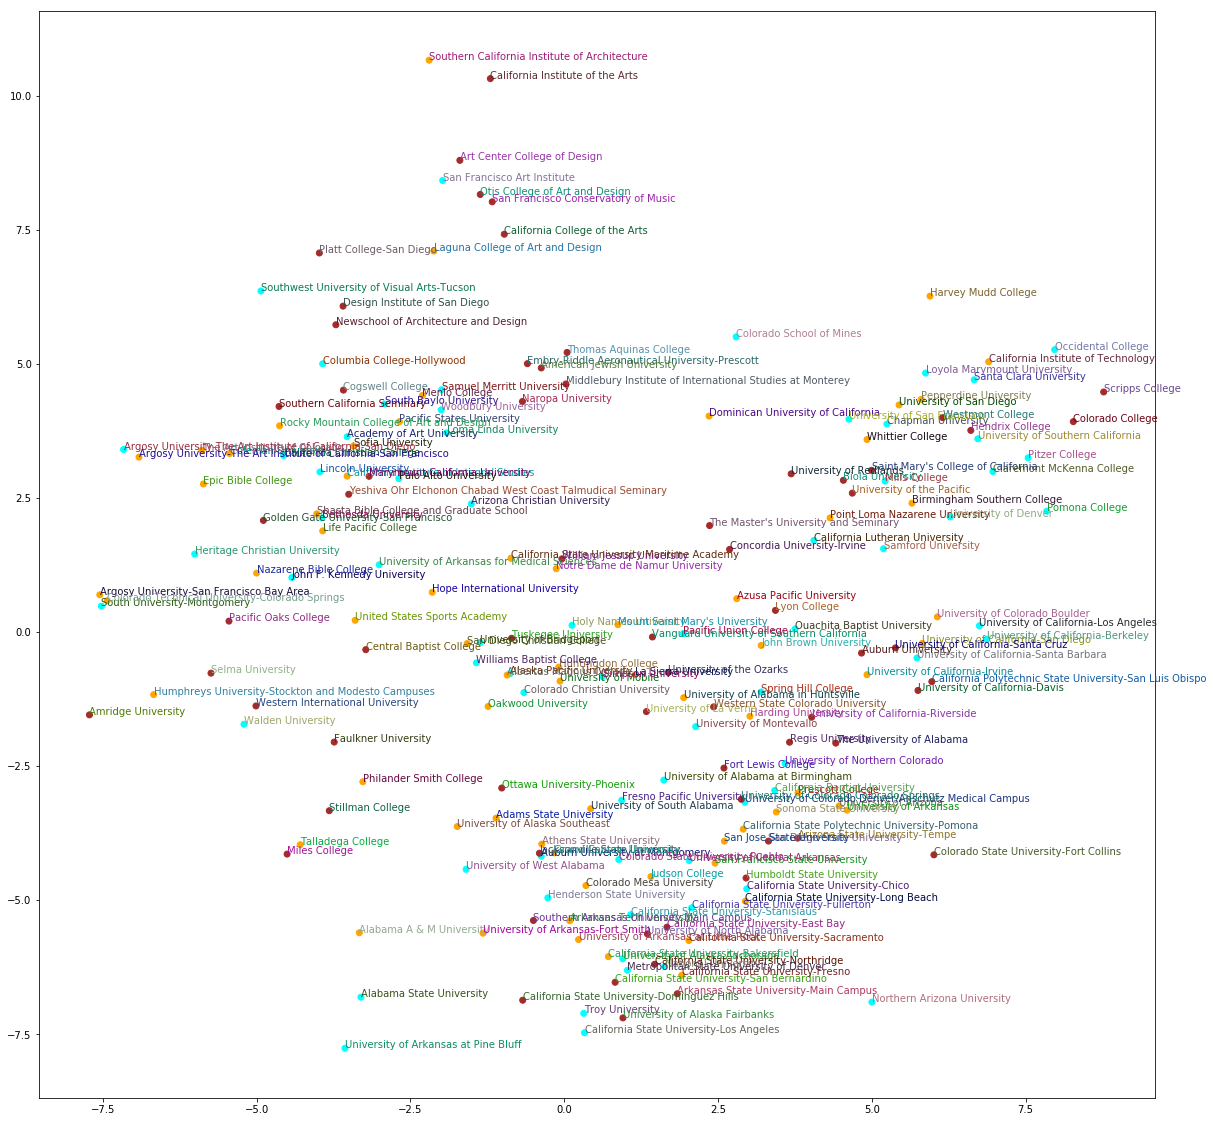

In [849]:
scatter_plot_pca(df, 200)